## Medical Chatbot - research & trials

- libraries

In [11]:
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer
import os
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore

In [2]:
def load_pdf_docs(data):
    loader = DirectoryLoader(data, glob="*.pdf", loader_cls=PyPDFLoader)
    document = loader.load()

    return document

In [3]:
data = load_pdf_docs(data='../data/chatbot_data/')

- splitting data into chunks

In [4]:
def split_data(sel_data):
    splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
    chunks = splitter.split_documents(sel_data)
    
    return chunks

In [5]:
chunks = split_data(data)
print("Lenght of chunks:", len(chunks))

Lenght of chunks: 7023


- Embeddings from HuggingFace

In [6]:
def download_hugging_face_embeddings():
    embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    # 384 dimensional vector 
    return embeddings

In [7]:
embeddings = download_hugging_face_embeddings()

C:\Users\adaml\AppData\Local\Temp\ipykernel_28404\3384718286.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')


- Pinecone index creation

In [8]:
PINECONE_API_KEY = os.environ["PINECONE_API_KEY"]

In [10]:
pc = Pinecone(api_key=PINECONE_API_KEY)
index_name = "index-1"

pc.create_index(
    name=index_name,
    dimension=384,   # model dimensions
    metric="cosine", # model metric
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    ) 
)

- Pinecone Vector Store

In [12]:
# Convert vector embedding

doc_search = PineconeVectorStore.from_documents(
    documents=chunks,
    index_name=index_name,
    embedding=embeddings
)

Example vector visualization with semantic scores:

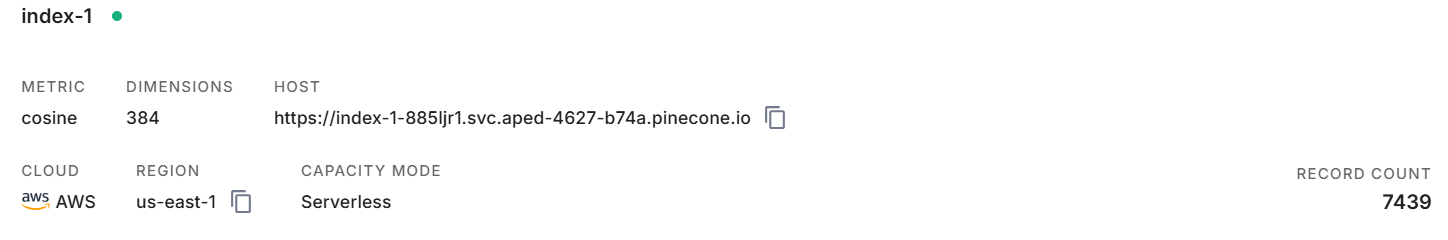

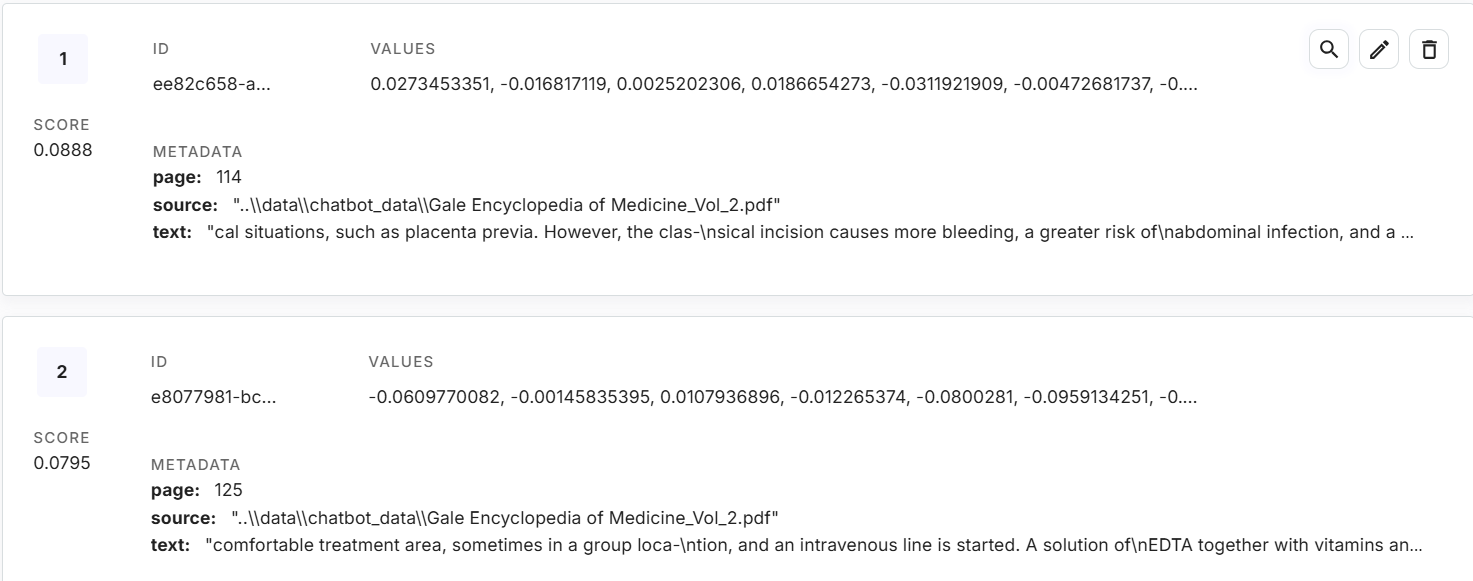